In [1]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from google.colab import drive
import os
import pickle
from scipy.signal import find_peaks, argrelextrema
from scipy.spatial.distance import cdist
lab_size = 30
plt.rcParams.update({'font.size': lab_size,"font.family": "Times New Roman"})
plt.rcParams['text.usetex'] = True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

def load_dictionary(file_path):
    with open(file_path, 'rb') as file:
        loaded_dictionary = pickle.load(file)
    print(f"Data loaded successfully from {file_path}")
    return loaded_dictionary

Mounted at /content/drive


In [7]:
# file_path = f'drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.00365_to_0.00350.pkl'
file_path1 = f'drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.00365_to_0.pkl'
file_path2 = f'drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.00365_to_0.00475.pkl'
#file_path = f'drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.05_to_0Q.pkl'
#file_path = f'drive/My Drive/Lorenz_birth_data/continuation_for_bifurcation_from_0.013_up.pkl'

In [6]:
#continuation_moving_down = load_dictionary(file_path)

NameError: name 'file_path' is not defined

In [8]:
continuation_moving_down = load_dictionary(file_path1)
#continuation_moving_down = continuation_moving_down)  # Reverse the array

continuation_moving_up = load_dictionary(file_path2)

bifurcation_analysis_loaded = np.concatenate((continuation_moving_down, continuation_moving_up[1:]))

top_line_data_structure = np.concatenate((continuation_moving_down, continuation_moving_up))

Data loaded successfully from drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.00365_to_0.pkl
Data loaded successfully from drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.00365_to_0.00475.pkl


In [9]:
def generate_spectral_radii_list(start, end, steps):
  spectral_radii = np.linspace(start, end, steps)
  spectral_radii = [np.round(p, 6) for p in spectral_radii]
  spectral_radii = [str(p) for p in spectral_radii]
  return spectral_radii

In [13]:
# spectral_radii_Lorenz_birth = generate_spectral_radii_list(0.00365, 0.00350, 60)
spectral_radii1 = generate_spectral_radii_list(0.00365, 0, 1435)
spectral_radii1 = [float(p) for p in spectral_radii1]
spectral_radii1 = spectral_radii1[:869]
#spectral_radii1.reverse()

spectral_radii2 = generate_spectral_radii_list(0.00365, 0.00475, 434)
spectral_radii2 = [float(p) for p in spectral_radii2]

spectral_radii = spectral_radii1 + spectral_radii2[1:]

In [11]:
spectral_radii_Lorenz_birth = generate_spectral_radii_list(1, 0, 1001)
spectral_radii = [float(p) for p in spectral_radii_Lorenz_birth]
spectral_radii_cont_down = spectral_radii[500:]

In [12]:
spectral_radii_Lorenz_birth = generate_spectral_radii_list(0, 1, 1001)
spectral_radii = [str(p) for p in spectral_radii_Lorenz_birth]
spectral_radii_cont_down = spectral_radii[:13]
spectral_radii_cont_up = spectral_radii[13:]
spectral_radii_cont_down.reverse()
spectral_radii_cont_up
spectral_radii_cont_up = [float(p) for p in spectral_radii_cont_up]

## Local Maxima X3 vs SPectral radius

In [14]:
def single_trajectory_local_maxima_list(traj):
    local_maxima = []
    for i in range(1, len(traj) - 1):
        window = traj[i-1:i+2]
        middle_point = traj[i]
        # Find the local maxima in terms of the x coordinate.
        if middle_point[2] == max(window[0][2], window[1][2], window[2][2]):
            local_maxima.append((middle_point[2]))
    return local_maxima

def local_maximas_for_set_of_attractors(trajectory_set):
    local_maximas = [single_trajectory_local_maxima_list(traj) for traj in trajectory_set]
    return local_maximas
    # this is a list where each element is a list of local_maxima x_3 values e.g. for 3 attractors the outerlist would have 3 elements.
    # but each element of the outerlist could have as many local maximas as appear withing the simulation time.

In [19]:
def extract_data_for_bifurcation_diagram(bifurcation_analysis_loaded):
    local_maximas = []
    for trajectory_set in bifurcation_analysis_loaded:
        # Store the list of local maxima for this rho value
        local_maximas.append(local_maximas_for_set_of_attractors(trajectory_set))

    return local_maximas  # This is now a list of lists

# Example usage
local_maximas = extract_data_for_bifurcation_diagram(top_line_data_structure)

  # this returns a list with an entry for each spectral radius value included in the trial. each sublist containing an entry for each attractor.

  # need ability to index this object like this local_maxima[:, 2]

In [30]:
def plot_local_maxima_against_rho(rho_values, local_maximas):
    # Determine the number of attractors by checking the size of the first element in the list
    num_attractors = len(local_maximas[0])

    plt.figure(figsize=(15, 6))

    for attractor_index in range(num_attractors):
        flat_rho = []
        flat_maxima = []

        for i, maxima_list_for_rho in enumerate(local_maximas):
            # Get the local maxima list for the specified attractor at this rho value
            if attractor_index < len(maxima_list_for_rho):
                maxima_list = maxima_list_for_rho[attractor_index]
                # Add the rho value multiple times for each local maxima
                flat_rho.extend([rho_values[i-1]] * len(maxima_list))
                flat_maxima.extend(maxima_list)

        # Scatter plot of rho vs local maxima for each attractor
        plt.scatter(flat_rho, flat_maxima, label=f'$\\mathbf{{\\mathcal{{A}}}}_{{{attractor_index + 1}}}$')

    # Customize the x-axis ticks
    plt.xticks(ticks=np.round(np.linspace(min(rho_values), max(rho_values), num=5), 6))

    # Adjust the y-label with labelpad
    plt.ylabel('$x_3$', rotation=0, labelpad=30)

    # X-label and title
    plt.xlabel('$\\rho$')
    plt.title('Bifurcation diagram')

    # Add legend to differentiate attractors
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.show()

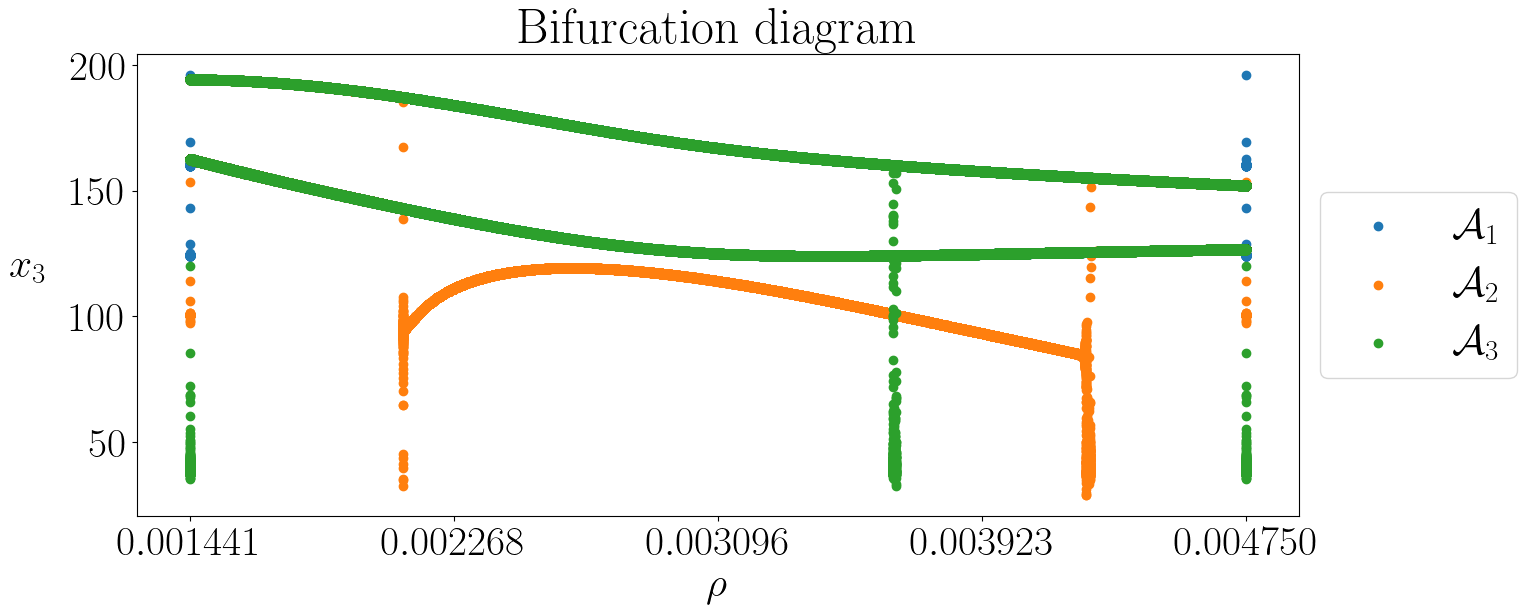

In [31]:
plot_local_maxima_against_rho(spectral_radii, local_maximas)